In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from pathlib import Path

In [ ]:
from gensim.models import LsiModel
from gensim.corpora.textcorpus import TextCorpus
from gensim.corpora import Dictionary
from gensim.parsing.preprocessing import remove_stopword_tokens

*У меня есть датасет с обращениями в техподдержку, который я разметил на шесть классов.
В этом ноутбуке я попробовал выделить классы автоматически тематическим моделированием с помощью алгоритма латентного семантического анализа и проверить получившиеся классы со своими.*

# Кластеризация текстов по темам:

In [ ]:
df_problems = pd.read_csv(
    '/content/drive/MyDrive/Исаков_ДЗ по аналитике_датасет - Лист1.csv') # предварительно табличку перевёл в csv
df_problems

,Обращение в ТП,Типы проблем
0,не заводится.,не заводится автомобиль
1,Больше суток не поступают деньги на телефон,сбои при пополнении баланса
2,Вопрос по клонированию ключа,другие проблемы с авто
3,не может завести авто,не заводится автомобиль
4,не заводится.,не заводится автомобиль
5,пополнил баланс не туда - что делать и как вер...,сбои при пополнении баланса
6,купил авто переоформить.,переоформление автомобиля
7,машина заводится и глохнет,не заводится автомобиль
8,пропустил звонок.,другие/недифференцируемые
9,батарейка в брелоке быстро садится.,другие проблемы с авто


In [ ]:
# Создаю корпус из поля "Обращение в ТП"

appeals = '\n'.join(list(df_problems['Обращение в ТП']))
with open('appeals corpus', 'w', encoding='utf-8') as file_corpus:
  file_corpus.write(appeals)

In [ ]:
# Загружаю корпус, токенизирую тексты

corpus = TextCorpus('/content/appeals corpus',
                    token_filters = [remove_stopword_tokens])
texts = list(corpus.get_texts())

In [ ]:
texts

[['не', 'заводится'],
 ['Больше', 'суток', 'не', 'поступают', 'деньги', 'на', 'телефон'],
 ['Вопрос', 'по', 'клонированию', 'ключа'],
 ['не', 'может', 'завести', 'авто'],
 ['не', 'заводится'],
 ['пополнил', 'баланс', 'не', 'туда', 'что', 'делать', 'и', 'как', 'вернуть'],
 ['купил', 'авто', 'переоформить'],
 ['машина', 'заводится', 'и', 'глохнет'],
 ['пропустил', 'звонок'],
 ['батареика', 'в', 'брелоке', 'быстро', 'садится'],
 ['перестали', 'приходить', 'пуш', 'уведомления'],
 ['техвопрос'],
 ['не', 'может', 'воити', 'в', 'систему'],
 ['Не', 'функционирует', 'мобильное', 'приложение'],
 ['купил', 'авто', 'переоформить'],
 ['Как', 'оформить', 'авто', 'на', 'нового', 'владельца'],
 ['продал', 'авто', 'как', 'переоформить'],
 ['Срочно', 'Не', 'заводится'],
 ['не', 'может', 'воити', 'в', 'систему'],
 ['не', 'заводится', 'повторная'],
 ['купил', 'авто', 'переоформить'],
 ['машина', 'не', 'заводится'],
 ['с', 'приложения', 'не', 'управляется'],
 ['не',
  'может',
  'воити',
  'в',
  'приложен

In [ ]:
dictionary = Dictionary(texts)
bow_corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
# Кластеризация с помощью латентного семантического разложения на 6 тем (столько я определил при разметке)

lsi_model = LsiModel(bow_corpus,
                     id2word=dictionary,
                     num_topics = 6,
                     chunksize = 20)

lsi_model.print_topics(-1, 5)

[(0,
  '0.734*"не" + 0.334*"в" + 0.293*"приложение" + 0.259*"может" + 0.228*"воити"'),
 (1,
  '-0.506*"баланс" + -0.296*"с" + -0.285*"связь" + -0.285*"положительныи" + -0.267*"как"'),
 (2,
  '-0.641*"авто" + -0.435*"переоформить" + -0.363*"купил" + 0.222*"баланс" + -0.161*"владельца"'),
 (3,
  '0.629*"заводится" + -0.304*"в" + -0.276*"приложение" + 0.256*"машина" + 0.194*"не"'),
 (4,
  '-0.521*"владельца" + -0.421*"Как" + -0.343*"сменить" + -0.291*"на" + -0.264*"номер"'),
 (5,
  '0.366*"машины" + 0.366*"показывает" + 0.366*"местоположение" + 0.325*"приложение" + -0.257*"может"')]

# Визуализация:

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

In [ ]:
# Применяю модель к корпусу, чтобы получить вероятности тем для каждого документа

texts_topics = lsi_model[bow_corpus]

In [ ]:
list(texts_topics)

[[(0, 0.9219884143641468),
  (1, 0.28668651341344076),
  (2, 0.04866597152304059),
  (3, 0.8232825797118166),
  (4, 0.09725031358366558),
  (5, -0.0174522123025853)],
 [(0, 0.8986698364668264),
  (1, 0.12735625913028187),
  (2, -0.15243730338253983),
  (3, 0.46353025380473856),
  (4, -0.7290752334278185),
  (5, -0.6376978201961022)],
 [(0, 0.011022817175029693),
  (1, -0.008390056160579515),
  (2, -0.060593496882369355),
  (3, 0.10581099401819048),
  (4, 0.05562332727434272),
  (5, 0.05587668075211481)],
 [(0, 1.100265151088614),
  (1, -0.09389776281006848),
  (2, -0.7564596168063787),
  (3, 0.11438743929956427),
  (4, 0.2641640407234923),
  (5, -0.37641615203316736)],
 [(0, 0.9219884143641468),
  (1, 0.28668651341344076),
  (2, 0.04866597152304059),
  (3, 0.8232825797118166),
  (4, 0.09725031358366558),
  (5, -0.0174522123025853)],
 [(0, 1.1605427745634858),
  (1, -1.4215184285543851),
  (2, 0.5751646954033771),
  (3, 0.1587911771423971),
  (4, 0.09266402587854664),
  (5, -1.178144260

In [ ]:
# Теперь задача — визуализировать 6мерные векторы в 2мерном пространстве

texts_topics_vectors = [[tpl[1] for tpl in txt] for txt in texts_topics]

In [ ]:
TTV_dataframe = pd.DataFrame(texts_topics_vectors).dropna()
TTV_dataframe

,0,1,2,3,4,5
0,0.921988,0.286687,0.048666,0.823283,0.097250,-0.017452
1,0.898670,0.127356,-0.152437,0.463530,-0.729075,-0.637698
2,0.011023,-0.008390,-0.060593,0.105811,0.055623,0.055877
3,1.100265,-0.093898,-0.756460,0.114387,0.264164,-0.376416
4,0.921988,0.286687,0.048666,0.823283,0.097250,-0.017452
5,1.160543,-1.421518,0.575165,0.158791,0.092664,-1.178144
6,0.102583,-0.584656,-1.438856,0.117609,0.507552,0.172753
7,0.327693,0.232359,0.213670,1.169509,0.120463,0.099713
9,0.379302,0.077213,0.028421,-0.468712,-0.300037,0.258960
12,1.650844,0.331513,-0.070209,-0.527614,0.078017,-0.557300


In [ ]:
# Хочется теперь добавить разметку по темам, которые атрибуировала модель

topics = TTV_dataframe.idxmax(axis=1)

In [ ]:
pca_model = PCA(n_components=2)
texts_topics_2Dvectors = pca_model.fit_transform(TTV_dataframe)
final_topics_matrix = np.c_[texts_topics_2Dvectors, topics]
final_topics_matrix

array([[ 3.98684981e-01, -1.66052661e-01,  0.00000000e+00],
       [ 3.06387749e-01, -1.69576344e-01,  0.00000000e+00],
       [-3.21510670e-01, -3.23827760e-02,  3.00000000e+00],
       [ 3.33229711e-01, -5.41511652e-01,  0.00000000e+00],
       [ 3.98684981e-01, -1.66052661e-01,  0.00000000e+00],
       [ 3.29788377e-01,  1.34603311e+00,  0.00000000e+00],
       [-9.04714459e-01, -7.53946221e-01,  4.00000000e+00],
       [-1.43651105e-01,  1.39637258e-03,  3.00000000e+00],
       [ 1.55002992e-01, -6.58315527e-03,  0.00000000e+00],
       [ 1.33286657e+00, -2.74285131e-01,  0.00000000e+00],
       [-2.21728737e-02,  9.91029322e-02,  5.00000000e+00],
       [-9.04714459e-01, -7.53946221e-01,  4.00000000e+00],
       [-9.48070538e-01, -6.09941218e-01,  3.00000000e+00],
       [-7.89052187e-01, -4.06033062e-01,  4.00000000e+00],
       [-2.10520881e-01, -9.91673478e-02,  3.00000000e+00],
       [ 1.33286657e+00, -2.74285131e-01,  0.00000000e+00],
       [ 4.12861961e-01, -1.77158936e-01

In [ ]:
topics_df = pd.DataFrame(final_topics_matrix, columns=['x', 'y', 'topics'])
topics_df

In [ ]:
topics_df

,x,y,topics
0,0.398685,-0.166053,0.0
1,0.306388,-0.169576,0.0
2,-0.321511,-0.032383,3.0
3,0.333230,-0.541512,0.0
4,0.398685,-0.166053,0.0
5,0.329788,1.346033,0.0
6,-0.904714,-0.753946,4.0
7,-0.143651,0.001396,3.0
8,0.155003,-0.006583,0.0
9,1.332867,-0.274285,0.0


<Axes: xlabel='x', ylabel='y'>

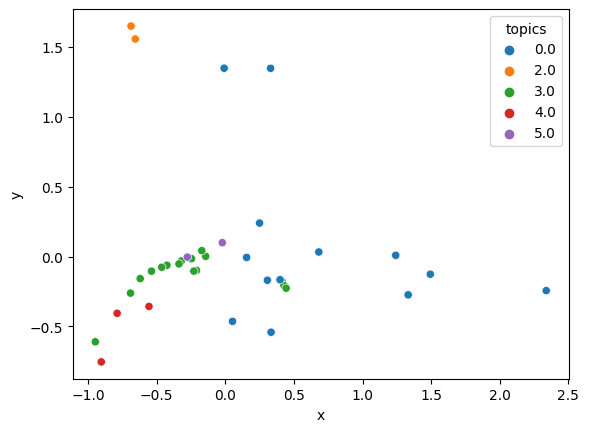

In [ ]:
sns.scatterplot(data=topics_df,
                x=topics_df['x'],
                y=topics_df['y'],
                hue=topics_df['topics'],
                palette='tab10')

Кластеризация на 6 классов выделяет схожие с выделенными мной классы: 
1. не + в + приложение + может + войти ~ сбои в работе приложений (действительно большая их часть связана с проблемами при входе, что я не отразил в названии класса)
2. авто + переоформить + купил + владельца + Как ~ переоформление автомобиля
3. баланс + с + положительным + связь + как ~ сбои при пополнении баланса
4. заводится + в+ приложение + машина + не ~ не заводится автомобиль (но также и сбои в работе приложений)
6. владельца + Как + сменить + на + номер ~ переоформление автомобиля (модель, что справедливо, увидела две разных модели вопросов в этом классе)
7. машины + местоположение + показывает + приложение + может ~ другие проблемы с авто
Ожидаемо, модель не может выделить класс “по остаточному принципу”, как это сделал я.

Что касается графика: класс сбои в работе приложений оказывается разбросанным по всей плоскости, класс сбои при пополнении баланса выделяется достаточно чётко в один кластер. А вот для остальных классов оказывается очень мало представителей (как ни странно), но они расположены близко друг к другу и на достаточно большом расстоянии друг от друга и других кластеров.
